In [1]:
import openmc

In [2]:
### Begin Materials Section ###

uo2 = openmc.Material(1, "uo2")
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)
uo2.temperature = 1000 #K
uo2.set_density('g/cm3', 10.0)


zirconium = openmc.Material(2, "zirconium")
zirconium.add_element('Zr', 1.0, 'wo')
zirconium.set_density('g/cm3', 6.6)


water = openmc.Material(3, "h2o")
water.add_nuclide('H1', 2.0)
water.add_element('O', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
water.set_density('g/cm3', 1.0)


mats = openmc.Materials([uo2, zirconium, water])
mats.export_to_xml()

### End Materials Section ###

In [3]:
### Begin Geometry Section ###

sph_1 = openmc.Sphere(r=1.0)
sph_2 = openmc.Sphere(r=1.1)

xz_plane = openmc.YPlane(y0=0)
yz_plane = openmc.XPlane(x0=0)


boundbox_xlow = openmc.XPlane(x0 = -2.0, boundary_type='vacuum')
boundbox_xhigh = openmc.XPlane(x0 = 2.0, boundary_type='vacuum')
boundbox_ylow = openmc.YPlane(y0 = -2.0, boundary_type='vacuum')
boundbox_yhigh = openmc.YPlane(y0 = 2.0, boundary_type='vacuum')
boundbox_zlow = openmc.ZPlane(z0 = -2.0, boundary_type='vacuum')
boundbox_zhigh = openmc.ZPlane(z0 = 2.0, boundary_type='vacuum')


NW_sphere = -sph_1 & +xz_plane & -yz_plane
inside_sphere = -sph_1 & (-xz_plane | +yz_plane) #OR -sph_1 & ~NW_sphere
shell = +sph_1 & -sph_2
boundbox = +boundbox_xlow & -boundbox_xhigh & +boundbox_ylow & -boundbox_yhigh & +boundbox_zlow & -boundbox_zhigh
outside_sphere = +sph_2 & boundbox


sphere_NW_cell = openmc.Cell(region=NW_sphere, fill=uo2)
sphere_in_cell = openmc.Cell(region=inside_sphere, fill=uo2)
shell_cell = openmc.Cell(region=shell, fill=zirconium)
sphere_out_cell = openmc.Cell(region=outside_sphere, fill=water)


universe = openmc.Universe(cells=[sphere_NW_cell, sphere_in_cell, shell_cell, sphere_out_cell])


geom = openmc.Geometry(universe)
geom.export_to_xml()

### End Geometry Section ###

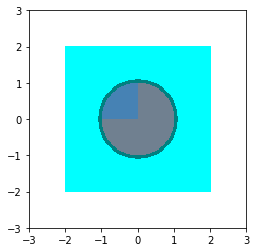

In [4]:
universe.plot(basis='xy', \
              origin=(0.0, 0.0, 0.0), \
              width=(6.0, 6.0), \
              pixels=(200,200), \
              colors = {sphere_NW_cell: 'steelblue', \
                       sphere_in_cell: 'slategrey', \
                       shell_cell: 'teal', \
                       sphere_out_cell: 'aqua'}) #SVG colornames

In [5]:
### Begin VolumeCalculation Section ###

vol = openmc.VolumeCalculation(domains=[uo2], \
                               samples=int(1e5), \
                               lower_left=[-3.0, -3.0, -3.0], \
                               upper_right=[3.0, 3.0, 3.0])
settings = openmc.Settings()
settings.volume_calculations = [vol]
settings.temperature = {'method': 'interpolation'}
settings.output = {'tallies': False}
settings.export_to_xml()


openmc.calculate_volumes()

### End VolumeCalculation Section ###

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################